<a href="https://colab.research.google.com/github/vaishnavikondaparthy/MachineLearning/blob/main/KNN_Random_forest_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

In [2]:
#read csv file
df=pd.read_csv("/content/breast_cancer_diagnosis.csv")

#K NEAREST NEIGHBORS CLASSIFICATION

Drive link for csv file:
https://drive.google.com/file/d/175rhCDkhPRr3tWGq2BT616ZAPUnYd_l5/view?usp=drive_link

In [3]:
df.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
#choose first 10 columns for the models data
df=df[['id','diagnosis','Radius_mean','Texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean']]

In [6]:
#divide the data into inputs and outputs
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [7]:
#split into train and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
#import KNeighborsClassifier from the library and train the model
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
#predict the outputs
y_test_hat=model.predict(X_test)
Results=pd.DataFrame({'actual':y_test,'prediction':y_test_hat})
Results.head()

,actual,prediction
421,B,B
47,M,B
292,B,B
186,M,M
414,M,B


In [13]:
#evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm=confusion_matrix(y_test,y_test_hat)
print(cm)

[[106   2]
 [ 39  24]]


In [14]:
#print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           B       0.73      0.98      0.84       108
           M       0.92      0.38      0.54        63

    accuracy                           0.76       171
   macro avg       0.83      0.68      0.69       171
weighted avg       0.80      0.76      0.73       171



In [17]:
#experiment with k values as 7
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_test_hat=model.predict(X_test)
Results=pd.DataFrame({'actual':y_test,'prediction':y_test_hat})
print(Results)
Results.head(10)


    actual prediction
421      B          B
47       M          B
292      B          B
186      M          M
414      M          B
..     ...        ...
6        M          M
487      M          B
11       M          M
268      B          B
419      B          B

[171 rows x 2 columns]


,actual,prediction
421,B,B
47,M,B
292,B,B
186,M,M
414,M,B
132,M,M
161,M,M
197,M,M
245,B,B
453,B,B


In [18]:
#print classification report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           B       0.74      0.91      0.81       108
           M       0.74      0.44      0.55        63

    accuracy                           0.74       171
   macro avg       0.74      0.68      0.68       171
weighted avg       0.74      0.74      0.72       171



#RANDOM FOREST CLASSIFIER

Drive link for csv file:https://drive.google.com/file/d/1rf6C1n19uv2aiqw_wVD0wNrC2Ycz-TF9/view?usp=drive_link



In [19]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#read csv file
df=pd.read_csv("/content/banknote_authentication.csv")

In [21]:
df.columns

Index(['variance', 'skew', 'kurtosis', 'entropy', 'authentic'], dtype='object')

In [22]:
#check for null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [23]:
#count the number of values in each class
df["authentic"].value_counts()

0    762
1    610
Name: authentic, dtype: int64

In [24]:
df.sample(n=5,random_state=55).sort_values(['variance'])

,variance,skew,kurtosis,entropy,authentic
1180,-2.21830,-1.2540,2.9986,0.36378,1
769,-0.89409,3.1991,-1.8219,-2.94520,1
1353,0.11592,3.2219,-3.4302,-2.84570,1
239,2.39520,9.5083,-3.1783,-3.00860,0
722,4.84510,8.1116,-2.9512,-1.47240,0


In [25]:
#split data into inputs and outputs
X=df.drop("authentic",axis=1)
y=df["authentic"]

In [26]:
#split data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [29]:
#import RandomForestClassifier model and train it
from sklearn.ensemble import RandomForestClassifier
Classifier=RandomForestClassifier(random_state=0,min_samples_leaf=10)
Classifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

In [31]:
#predict the values
y_test_hat=Classifier.predict(X_test)
Results=pd.DataFrame({'actual':y_test})
columns=pd.DataFrame({'prediction':y_test_hat})
Result=Results.join(columns.set_index(Results.index))
print(Result)

      actual  prediction
1240       1           1
703        0           0
821        1           1
1081       1           1
37         0           0
...      ...         ...
559        0           0
400        0           0
439        0           0
634        0           0
628        0           0

[412 rows x 2 columns]


In [32]:
#check accuracy of testing data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.9878640776699029


In [33]:
#check accuracy of training data
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.9885416666666667


In [34]:
#print confusion matrix
from sklearn.metrics import confusion_matrix,recall_score,precision_score
cm=confusion_matrix(y_test,y_test_hat)
print(cm)

[[231   4]
 [  1 176]]


In [37]:
#calculate recall, precision, specificity
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]
recall=TP/float(FN+TP)
precision=TP/float(TN+FP)
specificity=TN/float(TN+FP)
print("recall,precision,specificity=",recall,precision,specificity)

recall,precision,specificity= 0.9943502824858758 0.7489361702127659 0.9829787234042553


In [38]:
#print importance of each feature
feature_importances=pd.DataFrame(Classifier.feature_importances_,index=X_train.columns,columns=['importance']).sort_values('importance')
feature_importances

,importance
entropy,0.043526
kurtosis,0.133505
skew,0.223925
variance,0.599044


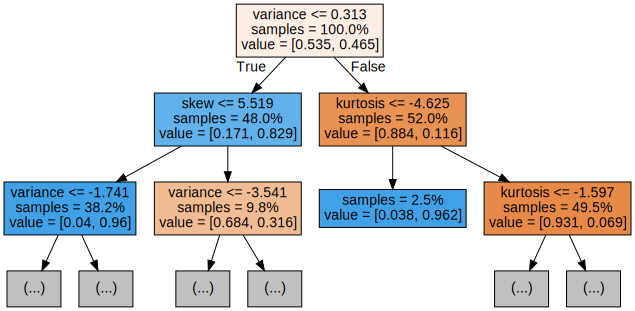

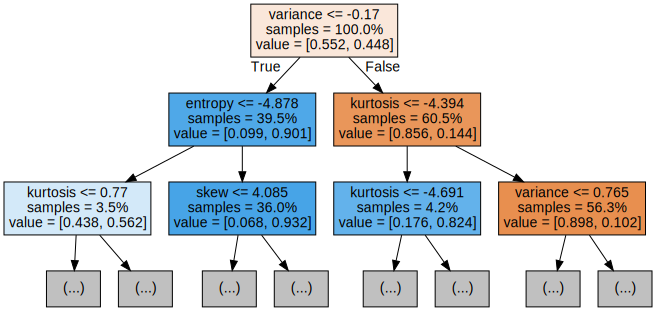

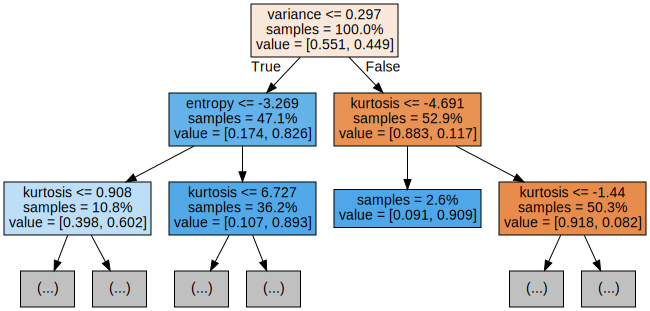

In [39]:
#visualize 3 trees
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree=Classifier.estimators_[i]
    dot_data=export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=2,impurity=False,proportion=True)
    graph=graphviz.Source(dot_data)
    display(graph)

#LOGISTIC REGRESSION

Drive link for csv file: https://drive.google.com/file/d/175rhCDkhPRr3tWGq2BT616ZAPUnYd_l5/view?usp=sharing

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read csv file
df = pd.read_csv('/content/breast_cancer_diagnosis.csv')

In [ ]:
#drop null values and print the column names
df.dropna(inplace = True)
df.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#checking for null values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
#check the number of examples belonging to each class
df['diagnosis'].value_counts()
#B is for cancer cell generation

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#segregating inputs and outputs
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0, stratify = y)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(solver = 'liblinear')
Classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#predict values
y_test_hat = Classifier.predict(X_test)
result = pd.DataFrame({'Actual':y_test, 'Predictions':y_test_hat})
print(result.head())

    Actual Predictions
510      B           M
520      B           M
311      B           M
25       M           M
530      B           M


In [ ]:
#check accuracy on training data
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.3742690058479532


In [ ]:
#check accuracy on testing data
y_train_hat=Classifier.predict(X_train)
print(accuracy_score(y_train,y_train_hat))

0.3793969849246231


In [ ]:
#getting probability predictions from the model
y_test_hat_prob=Classifier.predict_proba(X_test)
print(y_test_hat_prob.shape)

(171, 2)


In [ ]:
#compare the predicted values with the actual values along with the predicted
pls=y_test_hat_prob[:,1]
Results=pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat,'Prob(Class=M)':pls})
Results.head(10)

,Actual,Predictions,Prob(Class=M)
510,B,M,0.518996
520,B,M,0.512534
311,B,M,0.518108
25,M,M,0.553946
530,B,M,0.521317
7,M,M,0.519591
111,B,M,0.521231
128,B,M,0.530403
221,B,M,0.525481
445,B,M,0.518887
